In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    
    y = 3*x**2 - 4*x + 5
    y = 6*x -4 
    return y



In [3]:
xs = np.arange(-5,5,0.25)
print(xs)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


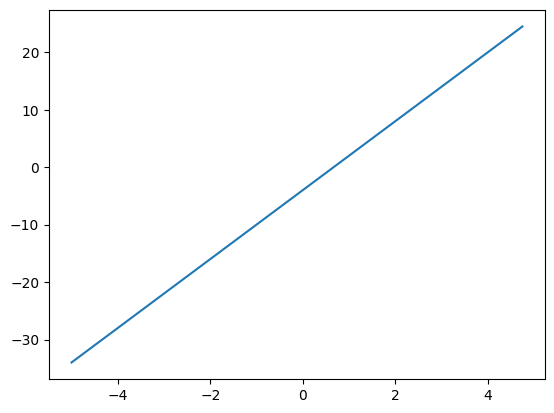

In [4]:
plt.plot(xs, f(xs))

In [5]:
#slope = (f(x+h) - f(x))/h
x = 3.0
h = 0.0001
slope = (f(x+h) - f(x))/h

In [6]:
print(slope)

6.000000000021544


In [7]:
class Value:
    
    def __init__(self, data, _children=(), _op = '', label ='' ):
  
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward=lambda:None
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"    

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad=1.0*out.grad
            other.grad=1.0*out.grad
        out._backward=_backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')  
        def _backward():
            self.grad=out.grad*other.data
            other.grad=out.grad*self.data
        out._backward=_backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1 - t ** 2) * out.grad  # chain rule application
        out._backward = _backward
        
        return out

## Setting up the Values


In [12]:
a = Value(2.0, label ='a')
b = Value(-3.0 , label ='b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f; L.label = 'L'


## Graph Function

In [9]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
#sets are unordered
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % ( n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

## Drawing the Graph

In [10]:
# L.grad = 1.0
# f.grad = 4.0
# d.grad = -2.0
# c.grad = -2.0
# e.grad = -2.0 
# a.grad = 6.0
# b.grad = -4.0

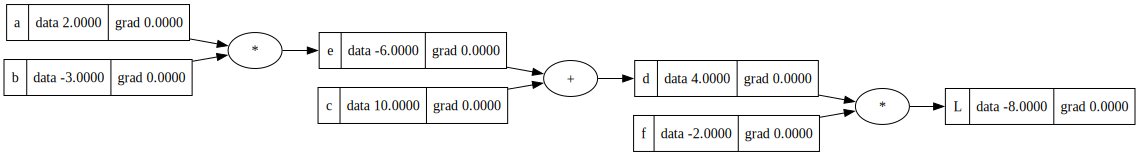

In [13]:
draw_dot(L)

In [ ]:
# L = f*d
# d(L)/d(f) = d(f*d)/d(f) = d 
# d(L)/ d(d) = d(f*d)/d(d) = f

In [ ]:
# d(L)/ d(e) = d(L)/d(d)*d(d)/d(e) = -2*1 = -2.0
# d = e + c

In [ ]:
# a.data+=0.01*a.grad
# b.data+=0.01*b.grad
# c.data+=0.01*c.grad
# f.data+=0.01*f.grad
# e=a*b
# d=e+c
# L=d*f
# print(L.data)

Neutral Network

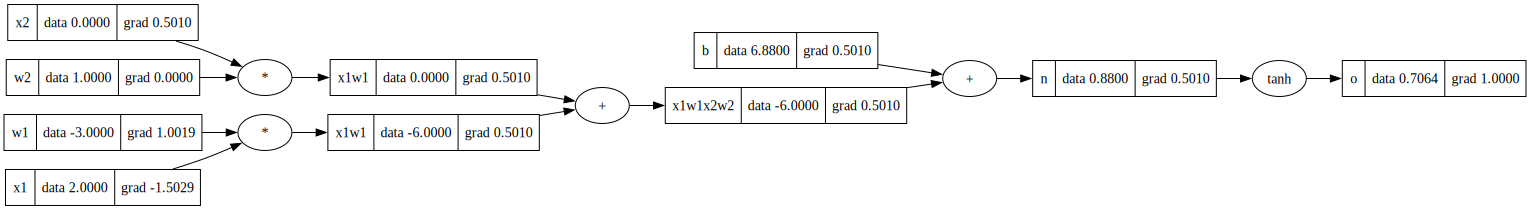

In [14]:
#input to the network
x1=Value(2.0, label='x1')
x2=Value(0.0, label='x2')
# weithgts of the network
w1=Value(-3.0, label='w1')
w2=Value(1.0, label='w2')
# biasing the network
b=Value(6.88, label ='b') # to prevent graph exlosion
x1w1=x1*w1; x1w1.label='x1w1'
x2w2=x2*w2; x2w2.label='x1w1'
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label='x1w1x2w2'
n=x1w1x2w2+b; n.label='n'
o=n.tanh();  o.label='o'
o.grad=1.0
o._backward()
n._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

draw_dot(o)

